In [2]:
# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Looking at the Data

In [7]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
df_train.shape

(42000, 785)

In [160]:
x_train = (df_train.ix[:,1:].values).astype('float32') # all pixel values
y_train = df_train.ix[:,0].values.astype('int32') # only labels i.e targets digits

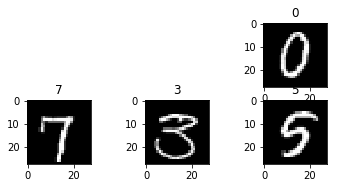

In [109]:
x_train = x_train.reshape(x_train.shape[0], 28, 28)

for i in range(5, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [130]:
x_train = df_train.iloc[:,1:].values
x_train = x_train.reshape(x_train.shape[0], 28, 28) #reshape to rectangular
x_train = x_train/255 #pixel values are 0 - 255 - this makes puts them in the range 0 - 1

# Single Digit

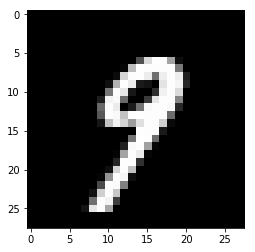

In [156]:
img = x_train[27]
show(img)

In [125]:
def show(img):
    plt.imshow(img, cmap = "gray", interpolation = "none")

In [126]:
rand_img = np.random.randint(0, 255, (28, 28))
rand_img = rand_img/255.0

In [127]:
rand_direction = np.random.rand(28, 28) 

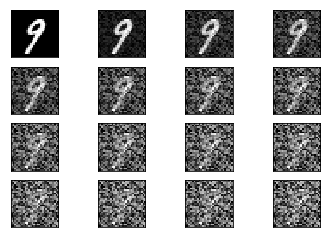

In [158]:
for i in range(16):
    plt.subplot(4,4,i+1)
    show(img + i/4*rand_direction)    
    plt.xticks([])
    plt.yticks([])